# Linear model

1. [The setup](#The-setup)
2. [The raw data](#The-raw-data)
3. [The processed data](#The-processed-data)
4. [The inputs](#The-inputs)
5. [The visualized input data](#The-visualized-input-data)
6. [Inputs preparation](#Inputs-preparation)
7. [Technique 1](#Technique-1)
8. [Technique 2](#Technique-2)

## The setup

Import the libraries:

In [54]:
import numpy as np
import pandas as pd

## The raw data

Import the data to work on from csv files:

In [55]:
salaries = pd.read_csv('Salaries.csv',index_col=0)
salaries.head()

,teamID,lgID,playerID,salary
yearID,,,,
1985,ATL,NL,barkele01,870000
1985,ATL,NL,bedrost01,550000
1985,ATL,NL,benedbr01,545000
1985,ATL,NL,campri01,633333
1985,ATL,NL,ceronri01,625000


In [56]:
teams = pd.read_csv('Teams.csv',index_col=0)
teams.head()

,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
yearID,,,,,,,,,,,,,,,,,,,,,
1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


## The processed data

### Salaries information

Get all salaries from Atlanta Braves (ATL) team

In [57]:
atl_salaries = salaries[salaries['teamID'] == 'ATL']
atl_salaries

,teamID,lgID,playerID,salary
yearID,,,,
1985,ATL,NL,barkele01,870000
1985,ATL,NL,bedrost01,550000
1985,ATL,NL,benedbr01,545000
1985,ATL,NL,campri01,633333
1985,ATL,NL,ceronri01,625000
...,...,...,...,...
2016,ATL,NL,stubbdr01,507500
2016,ATL,NL,teherju01,3466666
2016,ATL,NL,vizcaar01,897500


Get yearly salaries from ATL team

In [58]:
yearly_atl_salaries = atl_salaries.groupby('yearID').sum()
yearly_atl_salaries

,salary
yearID,
1985,14807000
1986,17102786
1987,16544560
1988,12728174
1989,11112334
1990,14555501
1991,18403500
1992,34625333
1993,41641417


### Team information

Get yearly information from ATL team:

In [59]:
yearly_atm_info = teams[teams['teamID']=='ATL']
yearly_atm_info

,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
yearID,,,,,,,,,,,,,,,,,,,,,
1966,NL,ATL,ATL,NaN,5,163,82.0,85,77,NaN,...,139,0.976,Atlanta Braves,Atlanta-Fulton County Stadium,1539801.0,103,102,ATL,ATL,ATL
1967,NL,ATL,ATL,NaN,7,162,81.0,77,85,NaN,...,148,0.978,Atlanta Braves,Atlanta-Fulton County Stadium,1389222.0,99,99,ATL,ATL,ATL
1968,NL,ATL,ATL,NaN,5,163,81.0,81,81,NaN,...,139,0.980,Atlanta Braves,Atlanta-Fulton County Stadium,1126540.0,101,101,ATL,ATL,ATL
1969,NL,ATL,ATL,W,1,162,81.0,93,69,Y,...,114,0.981,Atlanta Braves,Atlanta-Fulton County Stadium,1458320.0,101,101,ATL,ATL,ATL
1970,NL,ATL,ATL,W,5,162,81.0,76,86,N,...,118,0.977,Atlanta Braves,Atlanta-Fulton County Stadium,1078848.0,106,106,ATL,ATL,ATL
1971,NL,ATL,ATL,W,3,162,82.0,82,80,N,...,180,0.977,Atlanta Braves,Atlanta-Fulton County Stadium,1006320.0,106,107,ATL,ATL,ATL
1972,NL,ATL,ATL,W,4,155,78.0,70,84,N,...,130,0.974,Atlanta Braves,Atlanta-Fulton County Stadium,752973.0,109,110,ATL,ATL,ATL
1973,NL,ATL,ATL,W,5,162,81.0,76,85,N,...,142,0.974,Atlanta Braves,Atlanta-Fulton County Stadium,800655.0,108,108,ATL,ATL,ATL
1974,NL,ATL,ATL,W,3,163,81.0,88,74,N,...,161,0.979,Atlanta Braves,Atlanta-Fulton County Stadium,981085.0,104,104,ATL,ATL,ATL


Get yearly information from ATL team from 1985 to 2016 (to match with salaries data):

In [60]:
yearly_atm_info = yearly_atm_info.reset_index()
yearly_atm_info = yearly_atm_info[yearly_atm_info['yearID'] >= 1985]
yearly_atm_info = yearly_atm_info[yearly_atm_info['yearID'] <= 2016]
yearly_atm_info = yearly_atm_info.set_index('yearID')
yearly_atm_info

,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
yearID,,,,,,,,,,,,,,,,,,,,,
1985,NL,ATL,ATL,W,5,162,81.0,66,96,N,...,197,0.976,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL
1986,NL,ATL,ATL,W,6,161,81.0,72,89,N,...,181,0.978,Atlanta Braves,Atlanta-Fulton County Stadium,1387181.0,105,106,ATL,ATL,ATL
1987,NL,ATL,ATL,W,5,161,81.0,69,92,N,...,170,0.982,Atlanta Braves,Atlanta-Fulton County Stadium,1217402.0,104,106,ATL,ATL,ATL
1988,NL,ATL,ATL,W,6,160,79.0,54,106,N,...,138,0.976,Atlanta Braves,Atlanta-Fulton County Stadium,848089.0,104,106,ATL,ATL,ATL
1989,NL,ATL,ATL,W,6,161,79.0,63,97,N,...,124,0.976,Atlanta Braves,Atlanta-Fulton County Stadium,984930.0,102,104,ATL,ATL,ATL
1990,NL,ATL,ATL,W,6,162,81.0,65,97,N,...,133,0.974,Atlanta Braves,Atlanta-Fulton County Stadium,980129.0,105,106,ATL,ATL,ATL
1991,NL,ATL,ATL,W,1,162,81.0,94,68,Y,...,122,0.978,Atlanta Braves,Atlanta-Fulton County Stadium,2140217.0,106,106,ATL,ATL,ATL
1992,NL,ATL,ATL,W,1,162,81.0,98,64,Y,...,121,0.982,Atlanta Braves,Atlanta-Fulton County Stadium,3077400.0,107,105,ATL,ATL,ATL
1993,NL,ATL,ATL,W,1,162,81.0,104,58,Y,...,146,0.983,Atlanta Braves,Atlanta-Fulton County Stadium,3884720.0,101,100,ATL,ATL,ATL


Get yearly wins from ATL team:

In [61]:
yearly_atl_wins = yearly_atm_info[['W']]
yearly_atl_wins

,W
yearID,
1985,66
1986,72
1987,69
1988,54
1989,63
1990,65
1991,94
1992,98
1993,104


## The inputs

In [62]:
yearly_atl_salaries.size

32

In [63]:
yearly_atl_salaries

,salary
yearID,
1985,14807000
1986,17102786
1987,16544560
1988,12728174
1989,11112334
1990,14555501
1991,18403500
1992,34625333
1993,41641417


In [64]:
yearly_atl_wins.size

32

In [65]:
yearly_atl_wins

,W
yearID,
1985,66
1986,72
1987,69
1988,54
1989,63
1990,65
1991,94
1992,98
1993,104


## The visualized input data

In [66]:
import matplotlib.pyplot as plt

In [67]:

yearly_atl_salaries

,salary
yearID,
1985,14807000
1986,17102786
1987,16544560
1988,12728174
1989,11112334
1990,14555501
1991,18403500
1992,34625333
1993,41641417


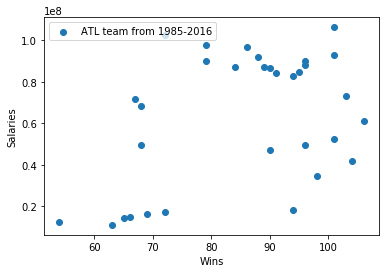

In [68]:
plt.scatter(yearly_atl_wins['W'], yearly_atl_salaries['salary'], label='ATL team from 1985-2016')
plt.ylabel('Salaries')
plt.xlabel('Wins')
plt.legend(loc='upper left')
plt.show()

## Inputs preparation

To use our inputs in a format that gives the best results, we'll add some processing.

### Creating the inputs with a new format

To handle the data easier, we'll create numpy arrays.

In [69]:
x = []

for salary in yearly_atl_salaries.reset_index()['salary'].to_numpy():
    x.append([salary])
    

x = np.array(x)
x

array([[ 14807000],
       [ 17102786],
       [ 16544560],
       [ 12728174],
       [ 11112334],
       [ 14555501],
       [ 18403500],
       [ 34625333],
       [ 41641417],
       [ 49383513],
       [ 47235445],
       [ 49698500],
       [ 52278500],
       [ 61186000],
       [ 73140000],
       [ 84537836],
       [ 91936166],
       [ 92870367],
       [106243667],
       [ 90182500],
       [ 86457302],
       [ 90156876],
       [ 87290833],
       [102365683],
       [ 96726166],
       [ 84423666],
       [ 87002692],
       [ 82829942],
       [ 87871525],
       [ 97609000],
       [ 71781250],
       [ 68498291]], dtype=int64)

In [70]:
y = []

for win in yearly_atl_wins.reset_index()['W'].to_numpy():
    y.append([win])
    

y = np.array(y)
y

array([[ 66],
       [ 72],
       [ 69],
       [ 54],
       [ 63],
       [ 65],
       [ 94],
       [ 98],
       [104],
       [ 68],
       [ 90],
       [ 96],
       [101],
       [106],
       [103],
       [ 95],
       [ 88],
       [101],
       [101],
       [ 96],
       [ 90],
       [ 79],
       [ 84],
       [ 72],
       [ 86],
       [ 91],
       [ 89],
       [ 94],
       [ 96],
       [ 79],
       [ 67],
       [ 68]], dtype=int64)

### Scaling target variables

To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors will be saved, so we can go backwards when we use the network for predictions.

In [71]:
# Store scalings in a dictionary so we can convert back later
scaled_features = {}

mean, std = yearly_atl_salaries['salary'].mean(), yearly_atl_salaries['salary'].std()
scaled_features['salary'] = [mean, std]
x_scaled = (x - mean) / std
x_scaled

array([[-1.53228984],
       [-1.45963608],
       [-1.47730202],
       [-1.59807756],
       [-1.64921336],
       [-1.54024892],
       [-1.41847294],
       [-0.9051075 ],
       [-0.68307248],
       [-0.43806167],
       [-0.50604066],
       [-0.42809341],
       [-0.34644525],
       [-0.0645534 ],
       [ 0.31374974],
       [ 0.6744522 ],
       [ 0.908584  ],
       [ 0.93814826],
       [ 1.36136738],
       [ 0.85308648],
       [ 0.73519672],
       [ 0.85227556],
       [ 0.76157512],
       [ 1.23864247],
       [ 1.06017108],
       [ 0.67083911],
       [ 0.75245645],
       [ 0.62040321],
       [ 0.77995204],
       [ 1.08810976],
       [ 0.27074996],
       [ 0.16685556]])

In [72]:
mean, std = yearly_atl_wins['W'].mean(), yearly_atl_wins['W'].std()
scaled_features['wins'] = [mean, std]
y_scaled = (y - mean) / std
y_scaled

array([[-1.31543462],
       [-0.90342247],
       [-1.10942855],
       [-2.13945892],
       [-1.5214407 ],
       [-1.38410331],
       [ 0.60728874],
       [ 0.88196351],
       [ 1.29397565],
       [-1.17809724],
       [ 0.33261397],
       [ 0.74462612],
       [ 1.08796958],
       [ 1.43131304],
       [ 1.22530696],
       [ 0.67595743],
       [ 0.19527659],
       [ 1.08796958],
       [ 1.08796958],
       [ 0.74462612],
       [ 0.33261397],
       [-0.42274163],
       [-0.07939817],
       [-0.90342247],
       [ 0.05793921],
       [ 0.40128267],
       [ 0.26394528],
       [ 0.60728874],
       [ 0.74462612],
       [-0.42274163],
       [-1.24676593],
       [-1.17809724]])

In [73]:
scaled_features

{'salary': [63225822.65625, 31598997.419263322],
 'wins': [85.15625, 14.56267738366284]}

### Splitting the data into training, and testing sets

We train our models in the training set without looking at the testing set, and then we evaluate the results on the testing set to see how we did.

In [74]:
x_test_data = x_scaled[:round(x_scaled.size * 0.8)]
x_train_data = x_scaled[round(x_scaled.size * 0.8):]

y_test_data = y[:round(y.size * 0.8)]
y_train_data = y[round(y.size * 0.8):]

## Technique 1

We'll use a simple sequential neural network with a single layer.

In [75]:
import keras
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Dense
from keras.optimizers import SGD

We can then use Keras to create a simple linear model (called Dense() in Keras) and optimize it using SGD to minimize our mean squared error (mse):

In [76]:
model = Sequential([Dense(1, input_shape=(1,))])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.get_weights()

[array([[0.5820404]], dtype=float32), array([0.], dtype=float32)]

In [78]:
model.compile(optimizer='sgd', loss='mse')

The linear model created has set internal weights, which we can use to evaluate the loss function (MSE):

In [79]:
model.evaluate(x_test_data, y_test_data, verbose=0)

7594.1435546875

And proceed to train our network:

In [80]:
model.fit(x_test_data, y_test_data, batch_size=1, epochs=30)

Epoch 1/30
26/26 [==============================] - 0s 422us/step - loss: 4942.6636
Epoch 2/30
26/26 [==============================] - 0s 460us/step - loss: 1844.5183
Epoch 3/30
26/26 [==============================] - 0s 537us/step - loss: 764.6962
Epoch 4/30
26/26 [==============================] - 0s 460us/step - loss: 384.6397
Epoch 5/30
26/26 [==============================] - 0s 499us/step - loss: 246.4028
Epoch 6/30
26/26 [==============================] - 0s 422us/step - loss: 199.3224
Epoch 7/30
26/26 [==============================] - 0s 537us/step - loss: 182.2990
Epoch 8/30
26/26 [==============================] - 0s 575us/step - loss: 173.4917
Epoch 9/30
26/26 [==============================] - 0s 459us/step - loss: 173.3940
Epoch 10/30
26/26 [==============================] - 0s 499us/step - loss: 171.5287
Epoch 11/30
26/26 [==============================] - 0s 422us/step - loss: 172.3029
Epoch 12/30
26/26 [==============================] - 0s 537us/step - loss: 172.8462

Once trained, we evaluate our network using the train data:

In [81]:
model.evaluate(x_train_data, y_train_data, verbose=0)

191.0686492919922

In [82]:
raw_predictions = model.predict(x_train_data)
raw_predictions

array([[92.21558 ],
       [91.25864 ],
       [92.41483 ],
       [94.64795 ],
       [88.72481 ],
       [87.971924]], dtype=float32)

In [83]:
predictions = raw_predictions#[round(x[0] * scaled_features['wins'][1] + scaled_features['wins'][0]) for x in raw_predictions]
predictions

array([[92.21558 ],
       [91.25864 ],
       [92.41483 ],
       [94.64795 ],
       [88.72481 ],
       [87.971924]], dtype=float32)

In [84]:
target_data = y_train_data#[y[0] * scaled_features['wins'][1] + scaled_features['wins'][0] for y in y_train_data]
target_data

array([[89],
       [94],
       [96],
       [79],
       [67],
       [68]], dtype=int64)

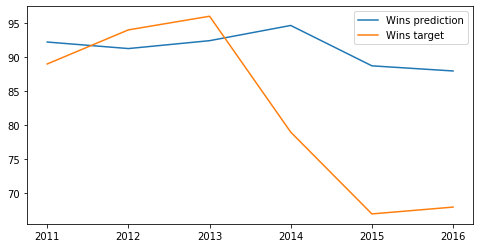

In [85]:
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(predictions,label='Wins prediction')
ax.plot(target_data,label='Wins target')
ax.legend()

# Configure dates to show in plot
dates = yearly_atl_wins.reset_index()['yearID'][round(x_scaled.size * 0.8):]
ax.set_xticks(np.arange(len(dates))[:])
_ = ax.set_xticklabels(dates[:])

## Technique 2

In [86]:
modelDeep = Sequential()

modelDeep.add(Dense(3, activation='relu', input_shape=(1,)))

modelDeep.add(Dense(3, activation='relu'))

modelDeep.add(Dense(3, activation='relu'))

modelDeep.add(Dense(1, activation='relu'))

modelDeep.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 4         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [87]:
modelDeep.compile(optimizer='adam', loss='mse')

In [88]:
modelDeep.fit(x_test_data, y_test_data, batch_size=1, epochs=200, verbose=1)

Epoch 1/200
26/26 [==============================] - 0s 537us/step - loss: 7569.9976
Epoch 2/200
26/26 [==============================] - 0s 536us/step - loss: 7538.1846
Epoch 3/200
26/26 [==============================] - 0s 536us/step - loss: 7503.5850
Epoch 4/200
26/26 [==============================] - 0s 575us/step - loss: 7465.0903
Epoch 5/200
26/26 [==============================] - 0s 574us/step - loss: 7421.3745
Epoch 6/200
26/26 [==============================] - 0s 614us/step - loss: 7373.2471
Epoch 7/200
26/26 [==============================] - 0s 537us/step - loss: 7319.0000
Epoch 8/200
26/26 [==============================] - 0s 613us/step - loss: 7258.4482
Epoch 9/200
26/26 [==============================] - 0s 536us/step - loss: 7190.8232
Epoch 10/200
26/26 [==============================] - 0s 613us/step - loss: 7115.2632
Epoch 11/200
26/26 [==============================] - 0s 537us/step - loss: 7035.9526
Epoch 12/200
26/26 [==============================] - 0s 652us/

26/26 [==============================] - 0s 499us/step - loss: 282.7121
Epoch 97/200
26/26 [==============================] - 0s 499us/step - loss: 271.0982
Epoch 98/200
26/26 [==============================] - 0s 575us/step - loss: 264.5774
Epoch 99/200
26/26 [==============================] - 0s 499us/step - loss: 254.2279
Epoch 100/200
26/26 [==============================] - 0s 499us/step - loss: 245.7477
Epoch 101/200
26/26 [==============================] - 0s 498us/step - loss: 238.5066
Epoch 102/200
26/26 [==============================] - 0s 499us/step - loss: 232.5067
Epoch 103/200
26/26 [==============================] - 0s 537us/step - loss: 226.1847
Epoch 104/200
26/26 [==============================] - 0s 460us/step - loss: 220.3814
Epoch 105/200
26/26 [==============================] - 0s 460us/step - loss: 215.5297
Epoch 106/200
26/26 [==============================] - 0s 537us/step - loss: 210.7935
Epoch 107/200
26/26 [==============================] - 0s 500us/step - 

26/26 [==============================] - 0s 499us/step - loss: 166.2613
Epoch 192/200
26/26 [==============================] - 0s 499us/step - loss: 167.2231
Epoch 193/200
26/26 [==============================] - 0s 575us/step - loss: 167.0509
Epoch 194/200
26/26 [==============================] - 0s 499us/step - loss: 166.6611
Epoch 195/200
26/26 [==============================] - 0s 461us/step - loss: 166.5021
Epoch 196/200
26/26 [==============================] - 0s 498us/step - loss: 166.3702
Epoch 197/200
26/26 [==============================] - 0s 499us/step - loss: 166.8214
Epoch 198/200
26/26 [==============================] - 0s 499us/step - loss: 166.3657
Epoch 199/200
26/26 [==============================] - 0s 537us/step - loss: 167.4795
Epoch 200/200
26/26 [==============================] - 0s 460us/step - loss: 165.9906


In [89]:
modelDeep.evaluate(x_train_data, y_train_data, verbose=0)

190.3300323486328

In [90]:
raw_predictions = modelDeep.predict(x_train_data)
raw_predictions

array([[92.129105],
       [91.19163 ],
       [92.3243  ],
       [94.511986],
       [88.70937 ],
       [87.971794]], dtype=float32)

In [91]:
predictions = raw_predictions#[round(tmp[0] * scaled_features['wins'][1] + scaled_features['wins'][0]) for tmp in raw_predictions]
predictions

array([[92.129105],
       [91.19163 ],
       [92.3243  ],
       [94.511986],
       [88.70937 ],
       [87.971794]], dtype=float32)

In [92]:
target_data = y_train_data#[tmp[0] * scaled_features['wins'][1] + scaled_features['wins'][0] for tmp in y_train_data]
target_data

array([[89],
       [94],
       [96],
       [79],
       [67],
       [68]], dtype=int64)

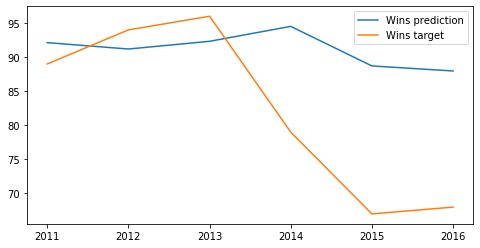

In [93]:
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(predictions,label='Wins prediction')
ax.plot(target_data,label='Wins target')
ax.legend()

# Configure dates to show in plot
dates = yearly_atl_wins.reset_index()['yearID'][round(x_scaled.size * 0.8):]
ax.set_xticks(np.arange(len(dates))[:])
_ = ax.set_xticklabels(dates[:])